In [1]:
%reset -f

In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import os
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [3]:
#----Cancer without denoising--------------------
df_cancer = pd.read_csv(r"/gpfs_projects/smriti.prathapan/EMBED/OUT/EMBED-cancer-list/20230729-063052__input_list_file_with_output_scores.csv")
#Cancer----with median k=10------------------------
df_cancer_medk10 = pd.read_csv(r"/gpfs_projects/smriti.prathapan/EMBED/OUT/denoised/cancer-list/med-k10/20230926-223327__input_list_file_with_output_scores.csv")
#--------in-control specificity-------------------
df = pd.read_csv(r"/gpfs_projects/ravi.samala/OUT/2023_MLDrift/20230803-091724__input_list_file_with_output_scores.csv")
#-----without denoising-----out-of-control days---------
df_out = pd.read_csv(r"/gpfs_projects/smriti.prathapan/EMBED/OUT/day61-20/20230830-105729__input_list_file_with_output_scores.csv")
#-----Median k=10-----------------------------
df_medk10 = pd.read_csv(r"/gpfs_projects/smriti.prathapan/EMBED/OUT/denoised/p6-12k/medk10/20230804-192403__input_list_file_with_output_scores.csv")


In [4]:
#-------Original  Specificity-------------------
#threshold = 0.31
#threshold = 0.013
threshold = 0.0177
#threshold = 0.024
#threshold = 0.0333  sp 0.9039
FP = df[df['preds'] > threshold]
TN = df[df['preds'] < threshold]


print("Total rows:",     df.index.size)
print("#Below Threshold", TN.index.size)
print("#Above Threshold",FP.index.size)
print("%FPs", FP.index.size/df.index.size)
print("Original Specificity", TN.index.size/df.index.size)

Total rows: 28392
#Below Threshold 23793
#Above Threshold 4599
%FPs 0.16198224852071005
Original Specificity 0.8380177514792899


In [5]:
#--------Original Sensitivity-------------------
#threshold = 0.31
#threshold = 0.013
threshold = 0.0177
#threshold = 0.0333   #se0.6157
TP = df_cancer[df_cancer['preds'] > threshold]
FN = df_cancer[df_cancer['preds'] < threshold]


print("Total rows:",     df_cancer.index.size)
print("#Below Threshold FN", FN.index.size)
print("#Above Threshold TP",TP.index.size)
print("%FNs", FN.index.size/df_cancer.index.size)
sensitivity = TP.index.size/df_cancer.index.size
sensitivity
print("Original Sensitivity", sensitivity)

Total rows: 557
#Below Threshold FN 156
#Above Threshold TP 401
%FNs 0.2800718132854578
Original Sensitivity 0.7199281867145422


In [6]:
#--------Denoised Specificity Median k=10-------------------
#threshold = 0.31
#threshold = 0.013
threshold = 0.0177
FP_k10 = df_medk10[df_medk10['preds'] > threshold]
TN_k10 = df_medk10[df_medk10['preds'] < threshold]


print("Total rows:",     df_medk10.index.size)
print("#Below Threshold", TN_k10.index.size)
print("#Above Threshold",FP_k10.index.size)
print("%FPs", FP_k10.index.size/FP_k10.index.size)
print("Specificity after Mediank=10:::", TN_k10.index.size/df_medk10.index.size)

Total rows: 28589
#Below Threshold 25072
#Above Threshold 3517
%FPs 1.0
Specificity after Mediank=10::: 0.8769806568960089


In [7]:
#--------Denoised Sensitivity Median k=10-------------------
#threshold = 0.31
#threshold = 0.013
threshold = 0.0177
#threshold = 0.0333   #se0.6157
TP_medk10 = df_cancer_medk10[df_cancer_medk10['preds'] > threshold]
FN_medk10 = df_cancer_medk10[df_cancer_medk10['preds'] < threshold]


print("Total rows:",     df_cancer_medk10.index.size)
print("#Below Threshold FN", FN_medk10.index.size)
print("#Above Threshold TP",TP_medk10.index.size)
print("%FNs", FN_medk10.index.size/df_cancer_medk10.index.size)
sensitivity_medk10 = TP_medk10.index.size/df_cancer_medk10.index.size
sensitivity_medk10
print("Sensitivity After Median filtering", sensitivity_medk10)

Total rows: 557
#Below Threshold FN 290
#Above Threshold TP 267
%FNs 0.5206463195691203
Sensitivity After Median filtering 0.4793536804308797


In [8]:
#Lables for Orignal positive and negative cases
df.columns
df['cancer']
df_cancer['cancer']
labels_negative = df['cancer']        #Cancer -ve
labels_positive = df_cancer['cancer'] #Cancer +ve
labels_pos      = np.ones(labels_positive.shape)
label_neg       = np.zeros(labels_negative.shape)
labels_o        = np.concatenate((labels_pos, label_neg))
labels_o.shape

(28949,)

In [9]:
#Predictions for Orignal positive and negative cases
df.columns
df['preds']
df_cancer['preds']
preds_negative = df['preds']
preds_positive = df_cancer['preds']
preds_o        = np.concatenate((preds_positive, preds_negative))
preds_o.shape

(28949,)

In [10]:
import sklearn
from sklearn.metrics import roc_auc_score

#Calculate AUC for original mammograms
AUC_o                 = roc_auc_score(labels_o,preds_o)
print("original AUC:", AUC_o)

original AUC: 0.861817758612055


In [11]:
#Lables for Filtered positive and negative cases
df_medk10.columns
df_medk10['cancer']
df_cancer_medk10['cancer']
labels_n_medk10 = df_medk10['cancer']        #Cancer -ve
labels_p_medk10 = df_cancer_medk10['cancer'] #Cancer +ve
labels_pos_medk10 = np.ones(labels_p_medk10.shape)
label_neg_medk10  = np.zeros(labels_n_medk10.shape)
labels_d        = np.concatenate((labels_pos_medk10, label_neg_medk10))
labels_d.shape

(29146,)

In [12]:
#Predictions for Filtered positive and negative cases
df_medk10.columns
df_medk10['preds']
df_cancer_medk10['preds']
preds_neg_medk10 = df_medk10['preds']
preds_pos_medk10 = df_cancer_medk10['preds']
preds_d        = np.concatenate((preds_pos_medk10, preds_neg_medk10))
preds_d.shape

(29146,)

In [13]:
#Calculate AUC for after filtering/denoising
AUC_d                 = roc_auc_score(labels_d,preds_d)
print("Filtered AUC:", AUC_d)

Filtered AUC: 0.7617791629063746


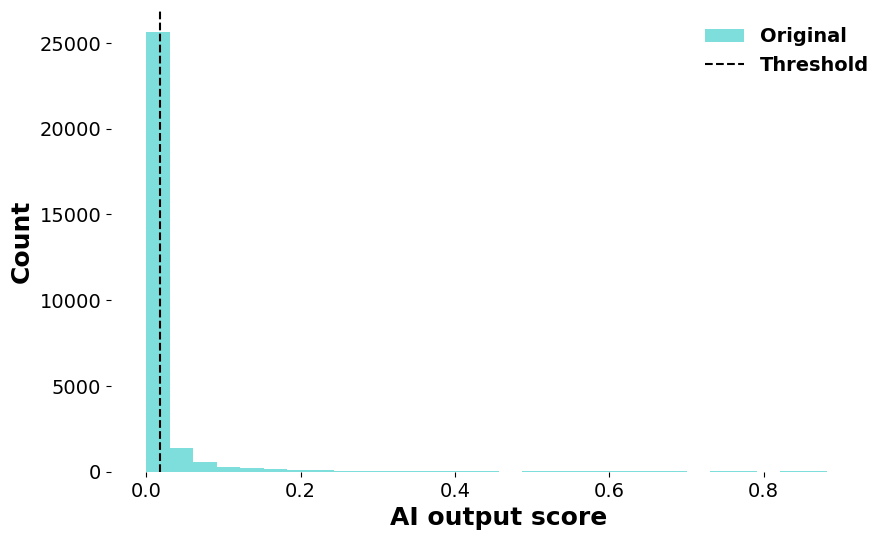

In [14]:
#Display the histogram of in-control AUC, along with the probability density function
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
rcParams['font.weight'] = 'bold'
#ax.hist(preds_o,  ec='mediumturquoise', color= 'mediumturquoise', alpha=0.9,   lw=1.5, histtype='step', label='Original')
#ax.hist(preds_d,  ec='coral',           color= 'coral',           alpha=0.9,   lw=1.5, histtype='step', label='Filtered')

count, bins, ignored = plt.hist(preds_o, bins=30, color = "mediumturquoise", alpha=0.7, label='Original')
#sns.histplot(data=preds_o, stat='density', common_norm=True, multiple='dodge', bins=np.arange(0, 48, 2), ax=ax)
#plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
#               np.exp( - (bins - mu)**2 / (2 * std**2) ),
#         linewidth=2, color='r')
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(visible=None)
ax.axvline(x=0.0177, color='black', linestyle='--', label='Threshold')  
#plt.xticks([0.725, 0.750, 0.775, 0.800, 0.825, 0.850, 0.875, 0.900, 0.925, 0.950])
#plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xlabel('AI output score', fontsize=18, fontweight='bold')
ax.set_ylabel('Count', fontsize=18, fontweight='bold')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend(fontsize=14, frameon=False)
# Hide grid lines
ax.grid(False)
# NO Frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#plt.title('mean=0.837',fontsize=14)
plt.show()

In [15]:
# AI Scores : ground truth negative
o_neg_score      = df['preds']
medk10_neg_score = df_medk10['preds']
num_neg_pre      = df.index.size
num_neg_post     = df_medk10.index.size

# AI Scores : ground truth positive
o_pos_score      = df_cancer['preds']
medk10_pos_score = df_cancer_medk10['preds']
num_pos          = df_cancer.index.size

#num_pos
#num_neg_pre
#num_neg_post


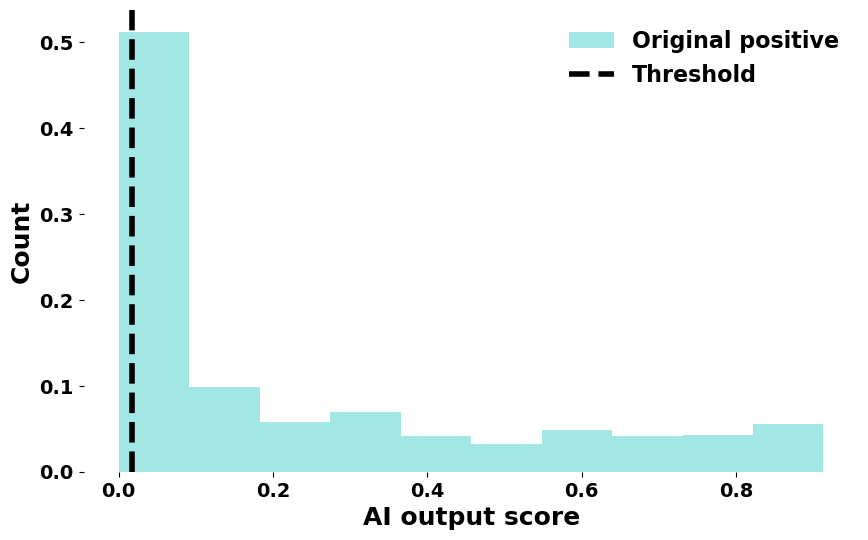

In [30]:
#Display the histogram of original positive cases

#import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import rcParams

fig, ax = plt.subplots(figsize=(10, 6))
rcParams['font.weight'] = 'bold'
#ax.hist(o_pos_score,  ec='mediumturquoise', color= 'mediumturquoise', alpha=0.9,   lw=1.5, histtype='bar', label='Original')
#ax.hist(preds_d,  ec='coral',           color= 'coral',           alpha=0.9,   lw=1.5, histtype='step', label='Filtered')

weights = np.ones_like(o_pos_score) / float(len(o_pos_score))
count, bins, ignored = plt.hist(o_pos_score, weights=weights, color = "mediumturquoise", alpha=0.5, label='Original positive')
#count, bins, ignored = plt.hist(o_pos_score, weights=weights, color = "mediumturquoise", alpha=0.5, histtype='step', label='Original positive')

weights_f = np.ones_like(medk10_pos_score) / float(len(medk10_pos_score))
#count, bins, ignored = plt.hist(medk10_pos_score, weights=weights_f, color = "coral", alpha=0.5, histtype='step', label='Filtered positive')

plt.rcParams['axes.facecolor'] = 'white'
plt.grid(visible=None)
ax.axvline(x=0.0177, color='black', linestyle='--', label='Threshold', linewidth=4.0)  
#plt.xticks([0.725, 0.750, 0.775, 0.800, 0.825, 0.850, 0.875, 0.900, 0.925, 0.950])
#plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xlabel('AI output score', fontsize=18, fontweight='bold')
ax.set_ylabel('Count', fontsize=18, fontweight='bold')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend(fontsize=16, frameon=False)
# Hide grid lines
ax.grid(False)
# NO Frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()



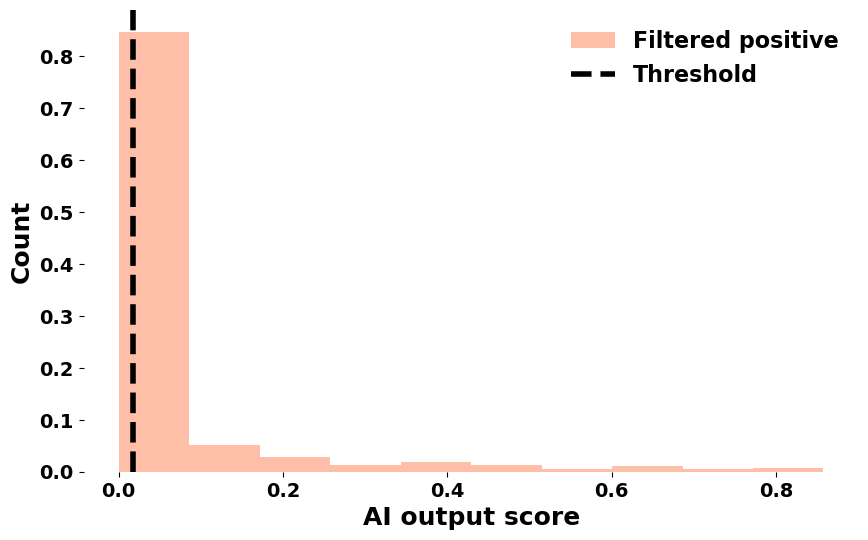

In [26]:
#Display the histogram of filtered positive cases

#import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import rcParams

fig, ax = plt.subplots(figsize=(10, 6))
rcParams['font.weight'] = 'bold'
#ax.hist(o_pos_score,  ec='mediumturquoise', color= 'mediumturquoise', alpha=0.9,   lw=1.5, histtype='bar', label='Original')
#ax.hist(preds_d,  ec='coral',           color= 'coral',           alpha=0.9,   lw=1.5, histtype='step', label='Filtered')

weights = np.ones_like(medk10_pos_score) / float(len(medk10_pos_score))
#count, bins, ignored = plt.hist(o_pos_score, weights=weights, color = "mediumturquoise", alpha=0.5, label='Original positive')
count, bins, ignored = plt.hist(medk10_pos_score, weights=weights, color = "coral", alpha=0.5, label='Filtered positive')
#sns.histplot(data=preds_o, stat='density', common_norm=True, multiple='dodge', bins=np.arange(0, 48, 2), ax=ax)
#plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
#               np.exp( - (bins - mu)**2 / (2 * std**2) ),
#         linewidth=2, color='r')
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(visible=None)
ax.axvline(x=0.0177, color='black', linestyle='--', label='Threshold', linewidth=4.0)  
#plt.xticks([0.725, 0.750, 0.775, 0.800, 0.825, 0.850, 0.875, 0.900, 0.925, 0.950])
#plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xlabel('AI output score', fontsize=18, fontweight='bold')
ax.set_ylabel('Count', fontsize=18, fontweight='bold')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend(fontsize=16, frameon=False)
# Hide grid lines
ax.grid(False)
# NO Frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.grid(True, color='lightgrey')


#plt.title('mean=0.837',fontsize=14)
plt.show()

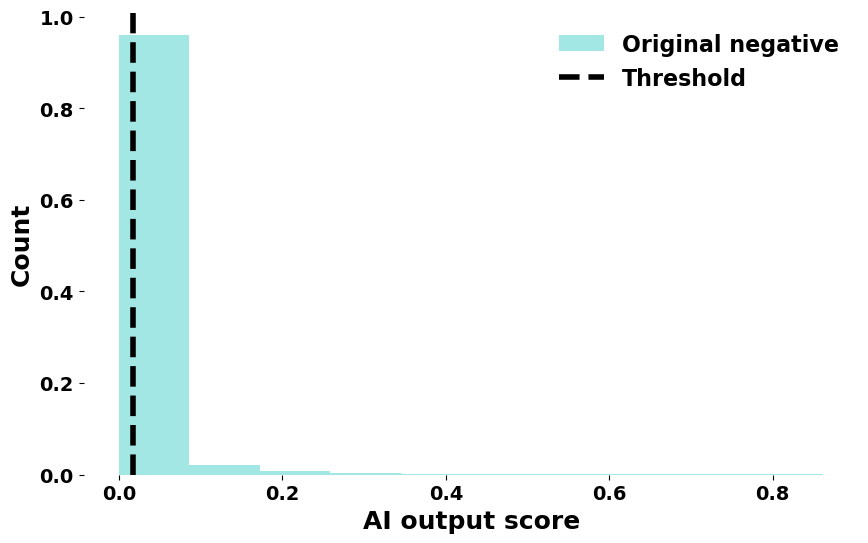

In [27]:
#Display the histogram of original negative cases

#import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import rcParams

fig, ax = plt.subplots(figsize=(10, 6))
rcParams['font.weight'] = 'bold'
#ax.hist(o_pos_score,  ec='mediumturquoise', color= 'mediumturquoise', alpha=0.9,   lw=1.5, histtype='bar', label='Original')
#ax.hist(preds_d,  ec='coral',           color= 'coral',           alpha=0.9,   lw=1.5, histtype='step', label='Filtered')

weights = np.ones_like(o_neg_score) / float(len(o_neg_score))
count, bins, ignored = plt.hist(o_neg_score, weights=weights, color = "mediumturquoise", alpha=0.5, label='Original negative')

#weights = np.ones_like(medk10_neg_score) / float(len(medk10_neg_score))
#count, bins, ignored = plt.hist(medk10_neg_score, weights=weights, color = "coral", alpha=0.5, label='Filtered negative')


#count, bins, ignored = plt.hist(medk10_pos_score, weights=weights, color = "coral", alpha=0.3, label='Original positive')

plt.rcParams['axes.facecolor'] = 'white'
plt.grid(visible=None)
ax.axvline(x=0.0177, color='black', linestyle='--', label='Threshold', linewidth=4.0)  
#plt.xticks([0.725, 0.750, 0.775, 0.800, 0.825, 0.850, 0.875, 0.900, 0.925, 0.950])
#plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xlabel('AI output score', fontsize=18, fontweight='bold')
ax.set_ylabel('Count', fontsize=18, fontweight='bold')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend(fontsize=16, frameon=False)
# Hide grid lines
ax.grid(False)
# NO Frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

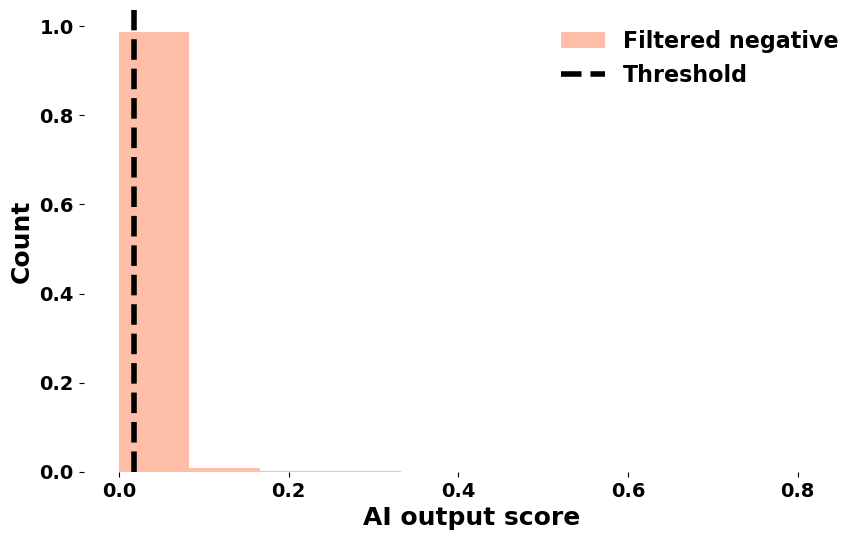

In [28]:
#Display the histogram of filtered negative cases

#import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import rcParams

fig, ax = plt.subplots(figsize=(10, 6))
rcParams['font.weight'] = 'bold'
#ax.hist(o_pos_score,  ec='mediumturquoise', color= 'mediumturquoise', alpha=0.9,   lw=1.5, histtype='bar', label='Original')
#ax.hist(preds_d,  ec='coral',           color= 'coral',           alpha=0.9,   lw=1.5, histtype='step', label='Filtered')

weights = np.ones_like(medk10_neg_score) / float(len(medk10_neg_score))
count, bins, ignored = plt.hist(medk10_neg_score, weights=weights, color = "coral", alpha=0.5, label='Filtered negative')
#count, bins, ignored = plt.hist(medk10_pos_score, weights=weights, color = "coral", alpha=0.3, label='Original positive')

plt.rcParams['axes.facecolor'] = 'white'
plt.grid(visible=None)
ax.axvline(x=0.0177, color='black', linestyle='--', label='Threshold', linewidth=4.0)  
#plt.xticks([0.725, 0.750, 0.775, 0.800, 0.825, 0.850, 0.875, 0.900, 0.925, 0.950])
#plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xlabel('AI output score', fontsize=18, fontweight='bold')
ax.set_ylabel('Count', fontsize=18, fontweight='bold')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend(fontsize=16, frameon=False)
# Hide grid lines
ax.grid(False)
# NO Frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

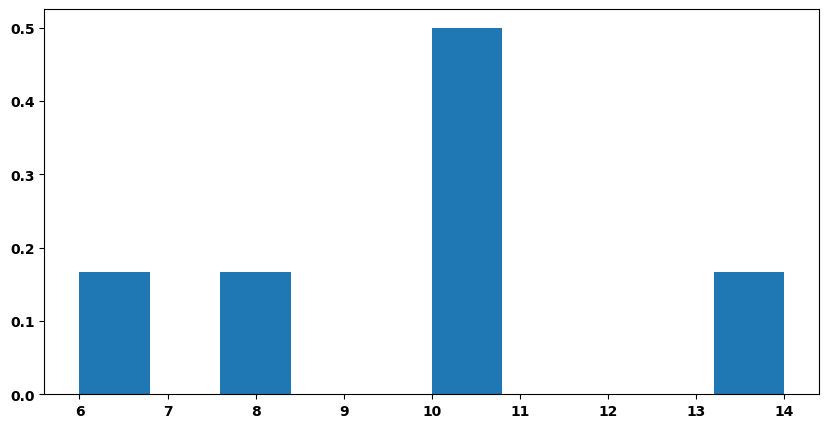

In [20]:
# Try out a normalized histogram - Divide the counts by the total number 
import numpy as np
import matplotlib.pyplot as plt
counts = [10, 10, 10, 8, 6, 14]
weights = np.ones_like(counts) / float(len(counts))
plt.figure(figsize=(10, 5))
plt.hist(counts, weights=weights)
#plt.hist(counts)

plt.show()

In [21]:
weights
1/(6)


0.16666666666666666